# 様々な分類モデルを動かしてみる

# ライブラリ

In [1]:
!pip install catboost

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# SVM
from sklearn.svm import SVC

# Neural Network with scikit-learn
from sklearn.neural_network import MLPClassifier

# XGBoost
import xgboost as xgb

# LightGBM
import lightgbm as lgb

# CatBoost
from catboost import CatBoostClassifier

# TensorFlow
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# データなどの準備

load_breast_cancerは、scikit-learnライブラリに組み込まれているデータセットで、乳がんの診断結果を予測するためのものです。このデータセットには、乳がんの良性（benign）または悪性（malignant）のラベルと、乳がん細胞の特徴を示す30の特徴量が含まれています。特徴量には、細胞の形やサイズなどの情報が含まれており、これを元にしてがんの良性・悪性を予測するモデルの学習に使用されます。データセットは、実際の医療データを元にしており、機械学習の入門や実践に役立つサンプルとして提供されています。

In [3]:
# 乱数シードの定義
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    tf.random.set_seed(seed)

SEED = 42
seed_everything(SEED)

# データの読み込み
data = load_breast_cancer()
X = data.data
y = data.target

# データのサイズを表示
print("X shape:", X.shape)
print("y shape:", y.shape)

# データの一部を表示
print("\nFirst 5 rows of X:")
print(X[:5])
print("\nFirst 5 elements of y:", y[:5])

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 分割後のデータサイズを表示
print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# データの一部を表示して標準化が正しく行われたか確認
print("\nFirst 5 rows of standardized X_train:")
print(X_train[:5])

# 正解率と予測結果を保存する辞書
accuracies = {}
predictions = {}

X shape: (569, 30)
y shape: (569,)

First 5 rows of X:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 

# 様々な分類モデル

## Logistic Regression


ロジスティック回帰は、分類問題を解くためのシンプルなモデルです。与えられた入力データに基づいて、出力が特定のカテゴリに属する確率を予測します。このコードでは、LogisticRegressionを使用してモデルを初期化し、fitメソッドで学習データを使ってモデルを訓練しています。max_iterは最大反復回数を指定し、random_stateは乱数のシード値を設定します。学習後、predictメソッドでテストデータの予測を行い、accuracy_scoreで正解率を計算しています。

In [4]:
clf_lr = LogisticRegression(random_state=SEED, max_iter=1000)
clf_lr.fit(X_train, y_train)
accuracies['Logistic Regression'] = accuracy_score(y_test, clf_lr.predict(X_test))
predictions['Logistic Regression'] = clf_lr.predict(X_test)

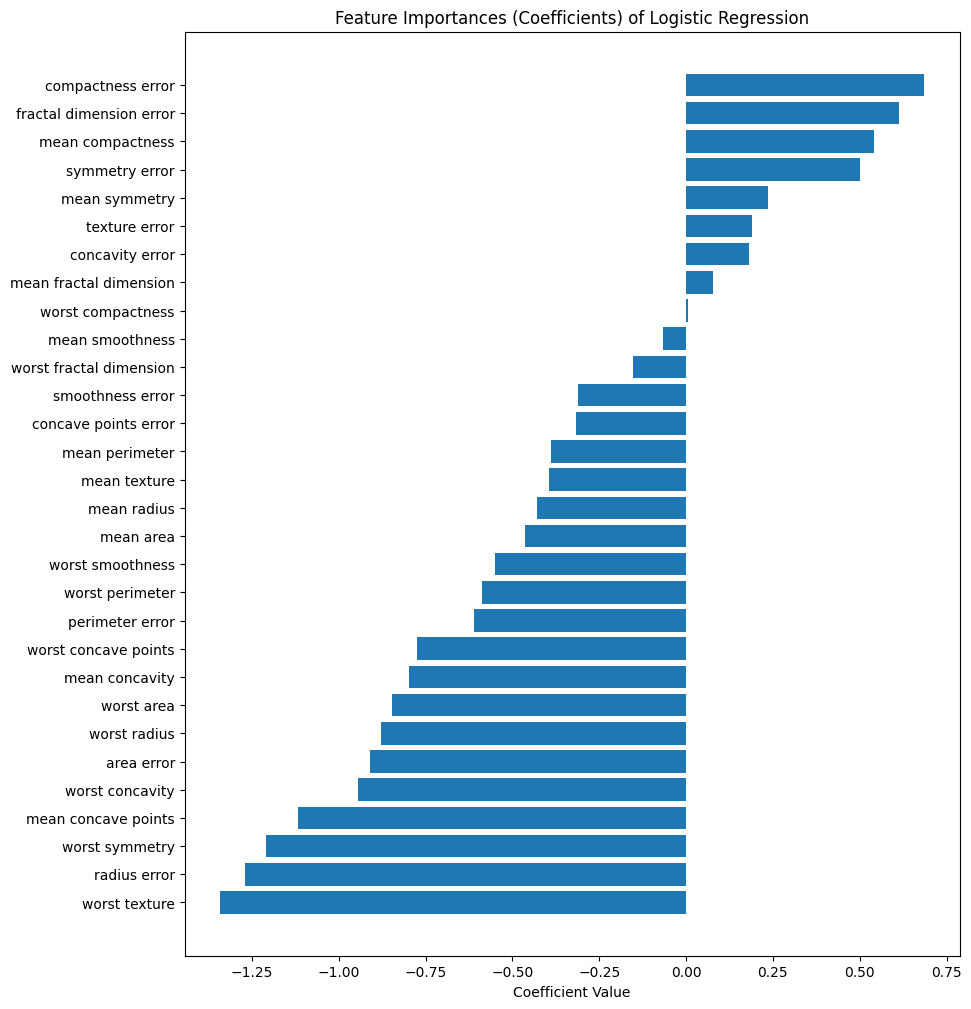

In [5]:
# 係数を取得
coefficients = clf_lr.coef_[0]

# 特徴の名前を取得
feature_names = data.feature_names

# 係数の絶対値でソート
sorted_idx = coefficients.argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), coefficients[sorted_idx])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel("Coefficient Value")
plt.title("Feature Importances (Coefficients) of Logistic Regression")
plt.show()

# Decision Tree

決定木は、データを分類するためのシンプルなモデルです。木の各ノードで特定の特徴に基づいてデータを分割し、最終的にリーフノードで予測を行います。このコードでは、DecisionTreeClassifierを使用して決定木のモデルを初期化しています。random_stateは乱数のシード値を設定し、結果の再現性を保証します。fitメソッドで学習データを使ってモデルを訓練し、predictメソッドでテストデータの予測を行います。最後に、accuracy_scoreで正解率を計算しています。決定木はその構造が可視化しやすく、理解しやすいため初学者にもおすすめです。

In [6]:
clf_dt = DecisionTreeClassifier(random_state=SEED)
clf_dt.fit(X_train, y_train)
accuracies['Decision Tree'] = accuracy_score(y_test, clf_dt.predict(X_test))
predictions['Decision Tree'] = clf_dt.predict(X_test)

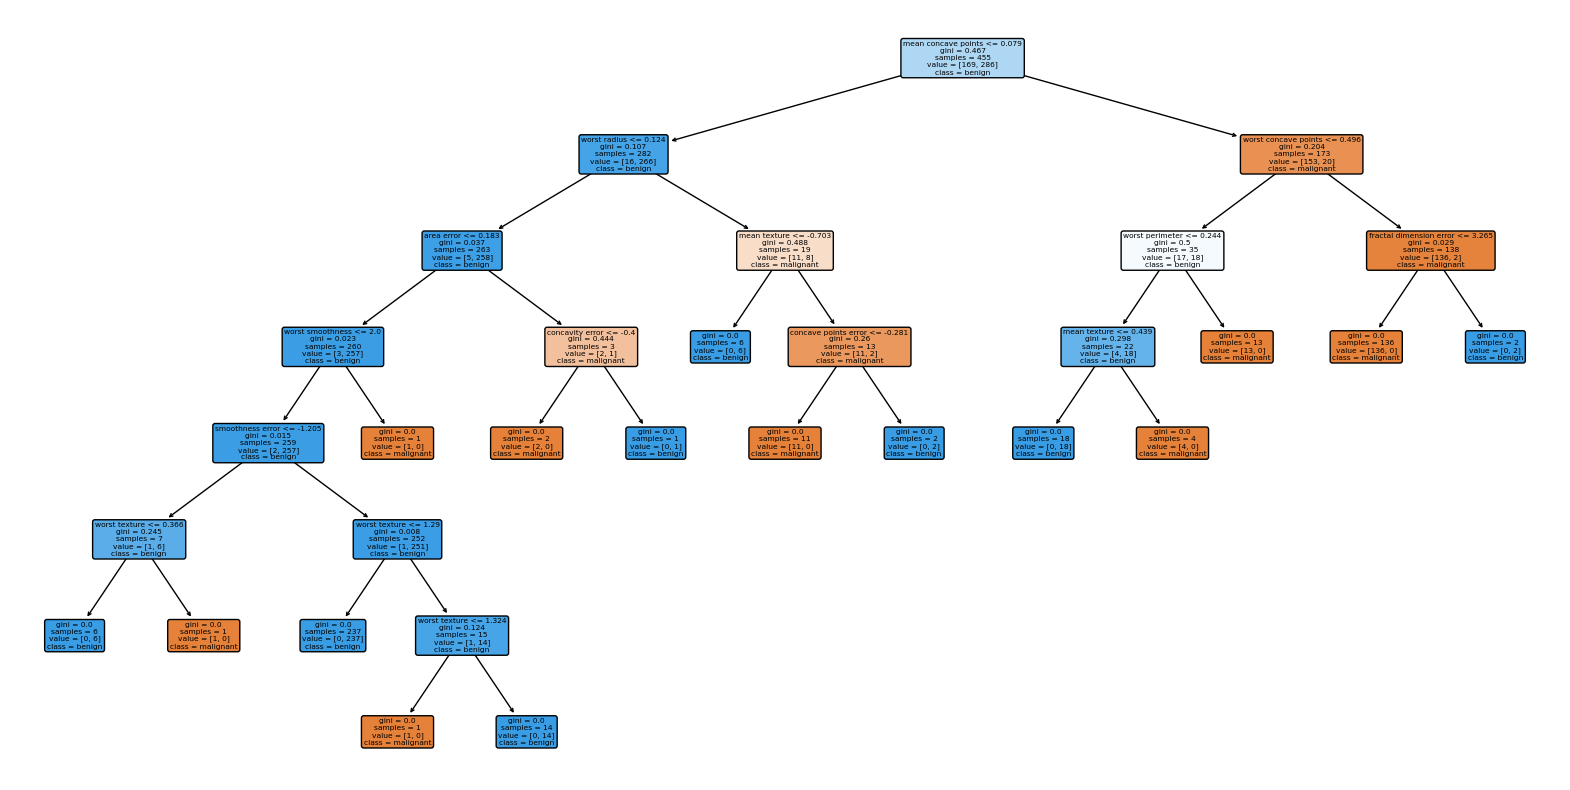

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(clf_dt, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

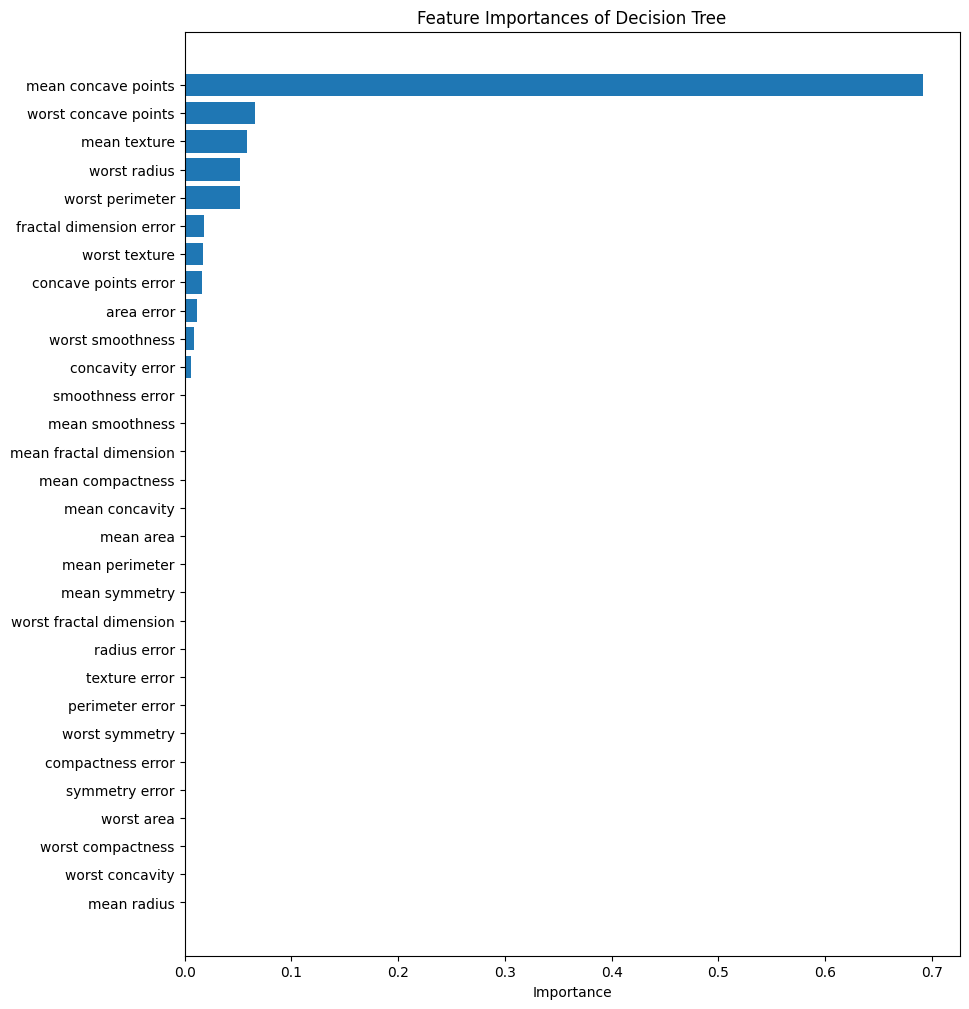

In [8]:
# 特徴の重要性を取得
importances = clf_dt.feature_importances_

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性でソート
sorted_idx = importances.argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importances of Decision Tree")
plt.show()

## RandomForest

ランダムフォレストは、複数の決定木を組み合わせて使う分類・回帰モデルです。各決定木はデータの一部をランダムに選んで学習し、その結果を集約して最終的な予測を行います。このコードでは、RandomForestClassifierを使って100本の決定木を持つランダムフォレストを初期化しています。n_estimatorsは決定木の数を指定し、random_stateは乱数のシード値を設定します。fitメソッドで学習を行い、predictメソッドでテストデータの予測をします。accuracy_scoreで正解率を計算しています。

In [9]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf_rf.fit(X_train, y_train)
accuracies['Random Forest'] = accuracy_score(y_test, clf_rf.predict(X_test))
predictions['Random Forest'] = clf_rf.predict(X_test)

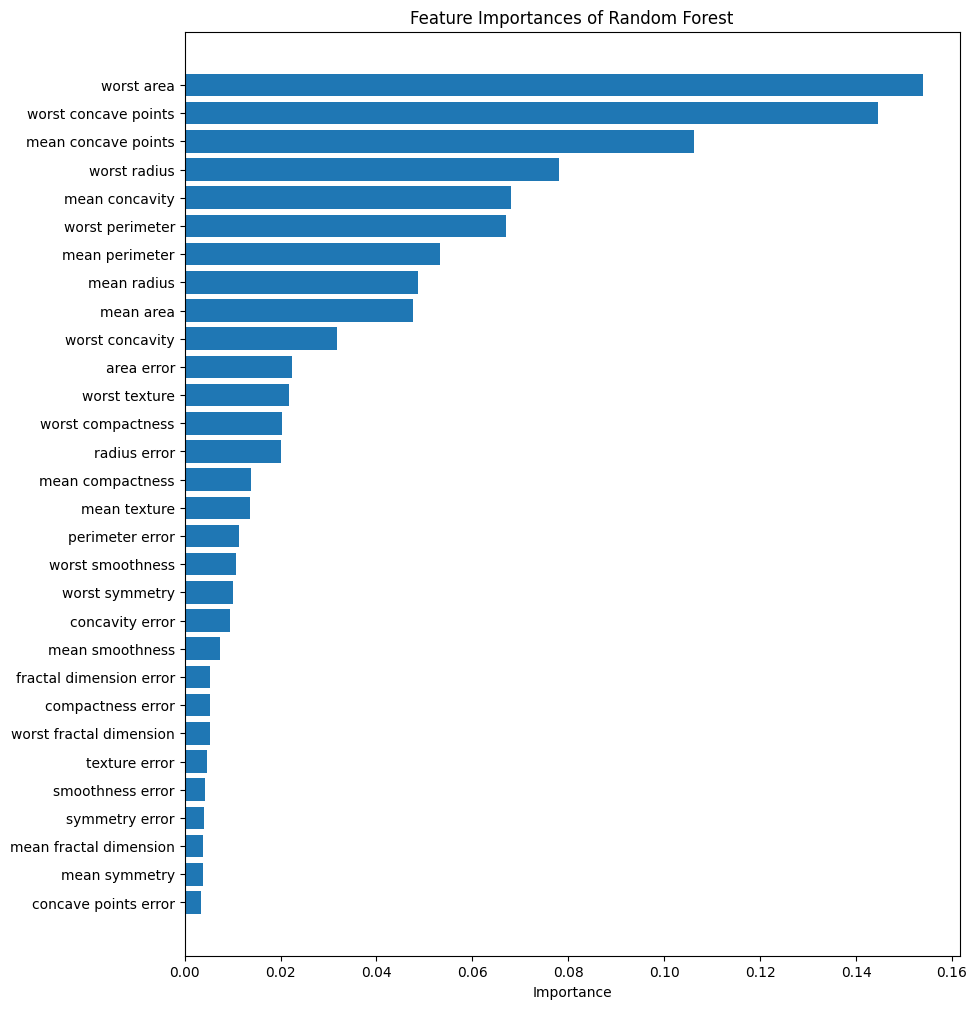

In [10]:
# 特徴の重要性を取得
importances = clf_rf.feature_importances_

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性でソート
sorted_idx = importances.argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importances of Random Forest")
plt.show()

## Gradient Boosting

グラディエントブースティングは、弱い学習機（通常は決定木）を逐次的に学習させ、それらの予測を組み合わせて性能を向上させるアンサンブル手法です。各ステップで、前のステップの誤差を修正するように新しいモデルを追加します。このコードでは、GradientBoostingClassifierを使用して100の決定木を順番に学習させています。n_estimatorsは決定木の数を指定し、random_stateは結果の再現性を保証するための乱数のシード値です。fitメソッドでモデルを訓練し、predictで予測を行い、正解率を計算しています。

In [11]:
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
clf_gb.fit(X_train, y_train)
accuracies['Gradient Boosting'] = accuracy_score(y_test, clf_gb.predict(X_test))
predictions['Gradient Boosting'] = clf_gb.predict(X_test)

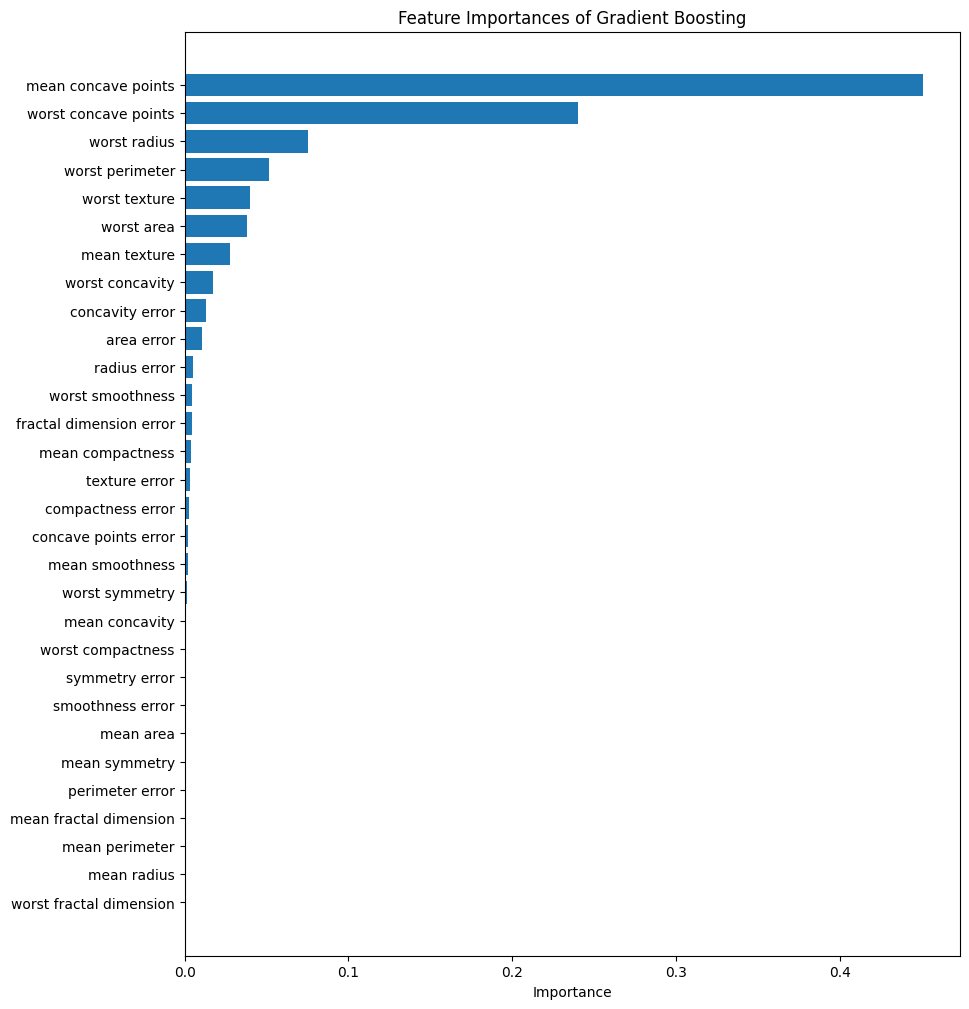

In [12]:
# 特徴の重要性を取得
importances = clf_gb.feature_importances_

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性でソート
sorted_idx = importances.argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importances of Gradient Boosting")
plt.show()

## SVM

サポートベクターマシン（SVM）は、データを高次元空間で最もよく分離する境界線（または面）を見つけるためのアルゴリズムです。この境界線のことを「超平面」と呼びます。このコードでは、SVCを使用して、線形のカーネルを持つSVMモデルを初期化しています。kernel='linear'は線形の境界線を使用することを示し、Cは誤分類のペナルティを制御するパラメータです。random_stateは乱数のシード値を設定します。fitメソッドでモデルを訓練し、predictで予測を行い、正解率を計算しています。SVMは複雑なデータの分類にも強力で、多くの応用例があります。

In [13]:
clf_svm = SVC(kernel='linear', C=1, random_state=SEED)
clf_svm.fit(X_train, y_train)
accuracies['SVM'] = accuracy_score(y_test, clf_svm.predict(X_test))
predictions['SVM'] = clf_svm.predict(X_test)

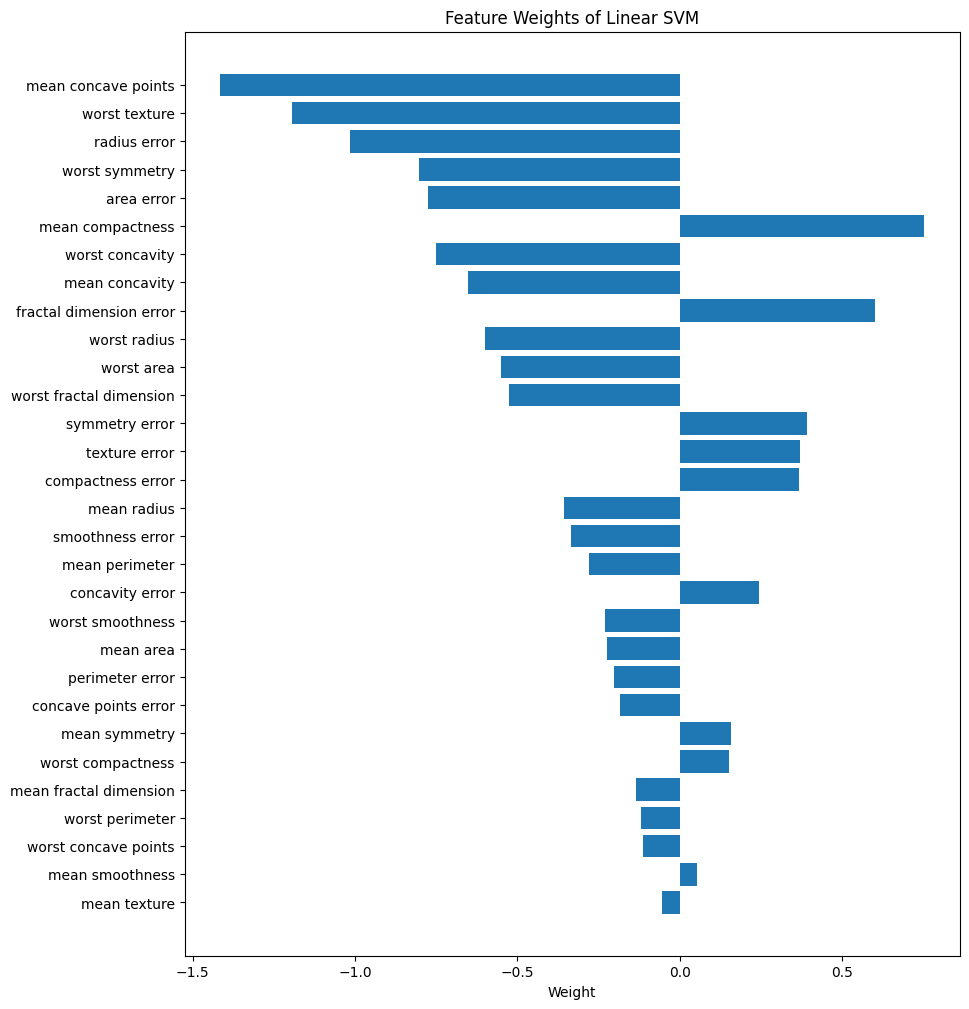

In [14]:
# 重みを取得
weights = clf_svm.coef_.flatten()

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性（重みの絶対値）でソート
sorted_idx = abs(weights).argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), weights[sorted_idx])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel("Weight")
plt.title("Feature Weights of Linear SVM")
plt.show()

## Neural Network with scikit-learn

ニューラルネットワークは、複数の層とノードからなる強力な学習モデルで、データの複雑なパターンを捉えることができます。このコードでは、MLPClassifierを使用して、2つの隠れ層（100ノードと50ノード）を持つニューラルネットワークを初期化しています。hidden_layer_sizesで各隠れ層のノード数を指定し、max_iterで最大学習回数を設定します。random_stateは結果の再現性を保証するための乱数のシード値です。fitメソッドでモデルを訓練し、predictで予測を行い、正解率を計算しています。ニューラルネットワークは画像認識や自然言語処理など、多岐にわたるタスクで使用されます。

In [15]:
clf_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=SEED)
clf_nn.fit(X_train, y_train)
accuracies['Neural Network (sklearn)'] = accuracy_score(y_test, clf_nn.predict(X_test))
predictions['Neural Network (sklearn)'] = clf_nn.predict(X_test)

## XGBoost

XGBoostは、高性能な勾配ブースティングライブラリです。勾配ブースティングは、弱い学習機を逐次的に追加して性能を向上させる手法で、XGBoostはこれを高速に実行します。このコードでは、DMatrixでデータをXGBoostの形式に変換し、xgb.trainでモデルを学習しています。params辞書で学習の設定を行い、binary:logisticは二値分類タスクを、gbtreeは決定木ベースのブースティングを指定しています。num_boost_roundでブースティングの回数を設定。学習後、predictで予測を行い、0.5を閾値として1または0のラベルを割り当てています。XGBoostはその高速性と精度で広く使われています。

In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'binary:logistic', 'booster': 'gbtree', 'seed': SEED}
bst = xgb.train(params, dtrain, num_boost_round=100)
preds_xgb = [1 if p > 0.5 else 0 for p in bst.predict(dtest)]
accuracies['XGBoost'] = accuracy_score(y_test, preds_xgb)
predictions['XGBoost'] = preds_xgb

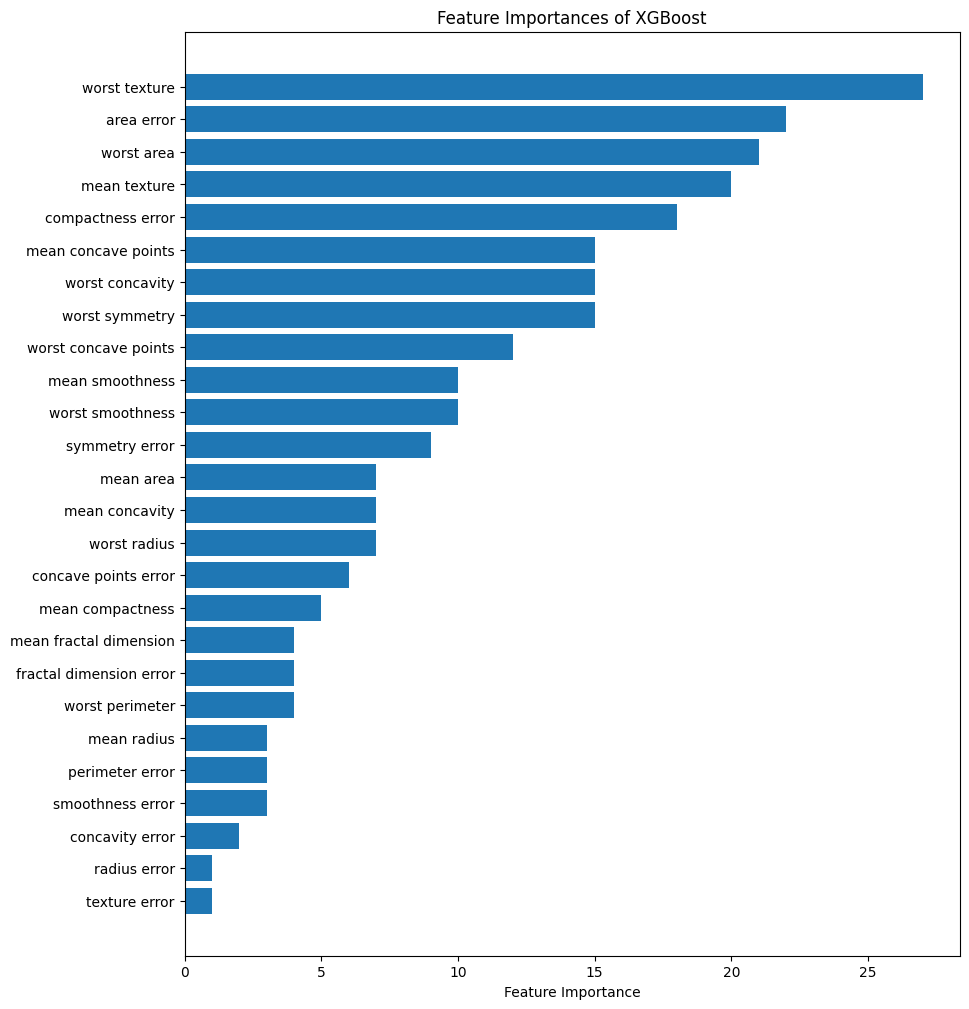

In [17]:
# 特徴の重要性を取得
feature_importance = bst.get_score(importance_type='weight')

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性でソート
sorted_idx = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# プロット
plt.figure(figsize=(10, 12))
plt.barh([feature_names[int(i[0][1:])] for i in sorted_idx], [i[1] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances of XGBoost")
plt.gca().invert_yaxis()  # 上位の特徴を上に表示
plt.show()

## LightGBM

LightGBMは、高性能な勾配ブースティングライブラリの一つです。大規模なデータセットや高次元のデータにも高速に対応できる特徴があります。このコードでは、lgb.DatasetでデータをLightGBMの形式に変換し、lgb.trainでモデルを学習しています。params辞書で学習の設定を行い、binaryは二値分類タスクを、gbdtは伝統的な勾配ブースティングを指定しています。num_boost_roundでブースティングの回数を設定。学習後、predictで予測を行い、0.5を閾値として1または0のラベルを割り当てています。LightGBMはその効率性と精度で多くのデータサイエンティストに支持されています。

In [18]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {'objective': 'binary', 'boosting_type': 'gbdt', 'seed': SEED, 'verbose': -1}
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])
preds_lgb = [1 if p > 0.5 else 0 for p in bst.predict(X_test, num_iteration=bst.best_iteration)]
accuracies['LightGBM'] = accuracy_score(y_test, preds_lgb)
predictions['LightGBM'] = preds_lgb

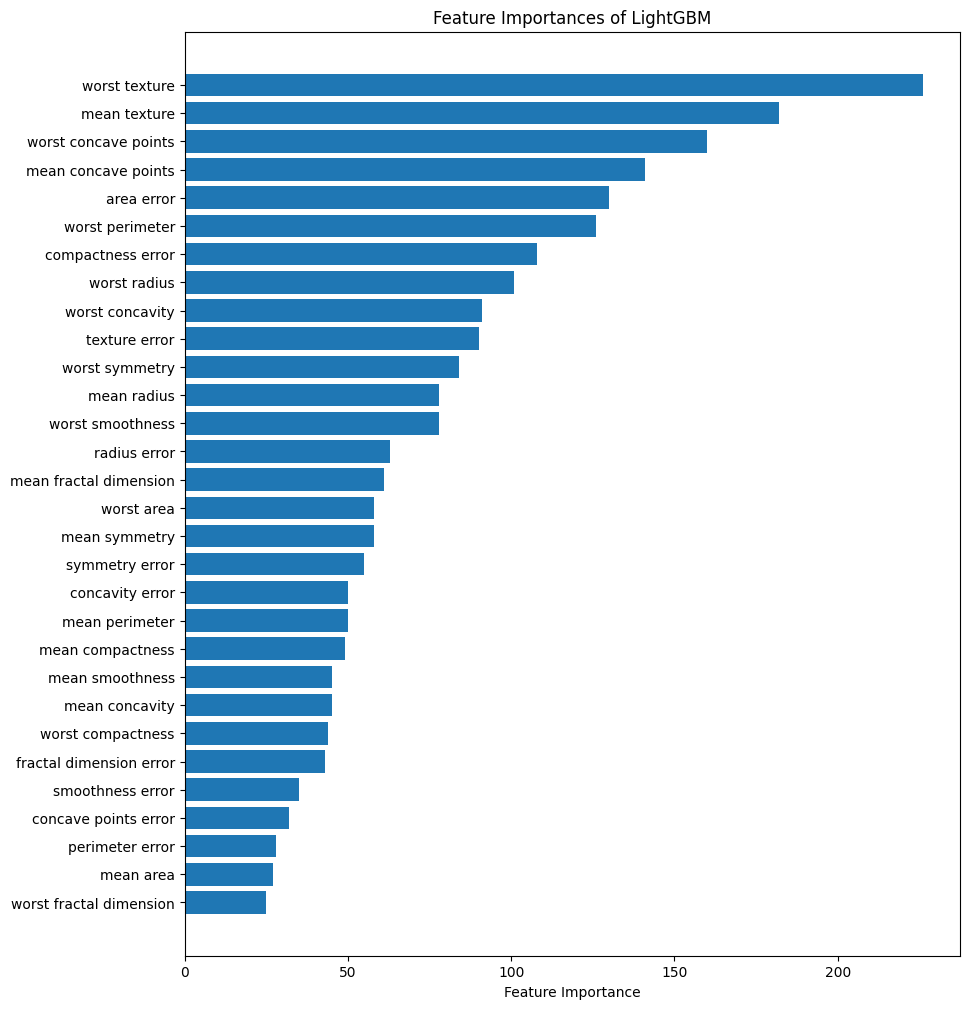

In [19]:
# 特徴の重要性を取得
feature_importance = bst.feature_importance()

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性でソート
sorted_idx = feature_importance.argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances of LightGBM")
plt.show()

## CatBoost

CatBoostは、高性能な勾配ブースティングライブラリの一つで、特にカテゴリカルなデータの取り扱いに優れています。このコードでは、CatBoostClassifierを使用してモデルを初期化しています。iterationsはブースティングの回数、learning_rateは学習のスピード、depthは決定木の深さを指定します。verbose=0は学習中のログを非表示にするための設定です。fitメソッドでモデルを学習し、predictで予測を行い、正解率を計算しています。CatBoostはその使いやすさと高い精度で、多くのデータサイエンティストに選ばれています。

In [20]:
clf_cb = CatBoostClassifier(iterations=100, random_seed=SEED, verbose=0)
clf_cb.fit(X_train, y_train)
accuracies['CatBoost'] = accuracy_score(y_test, clf_cb.predict(X_test))
predictions['CatBoost'] = clf_cb.predict(X_test)

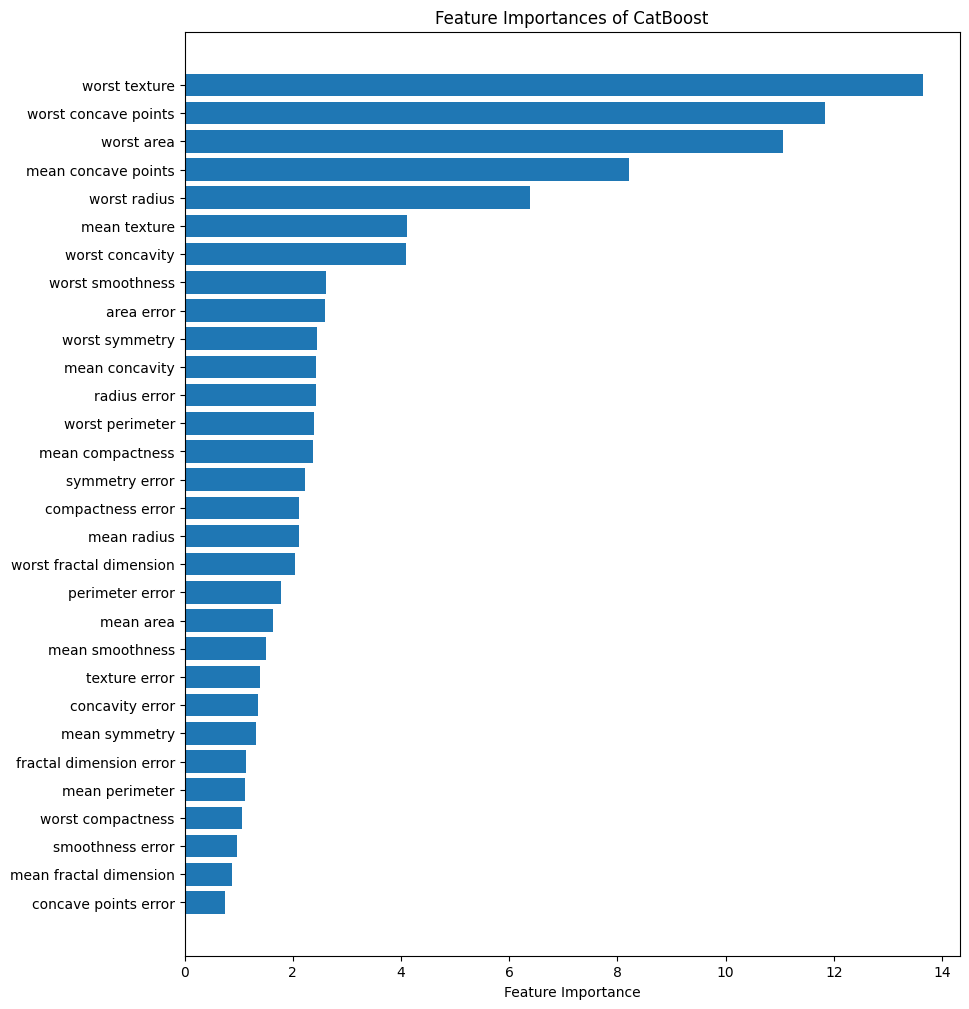

In [21]:
# 特徴の重要性を取得
feature_importance = clf_cb.get_feature_importance()

# 特徴の名前を取得
feature_names = data.feature_names

# 重要性でソート
sorted_idx = feature_importance.argsort()

# プロット
plt.figure(figsize=(10, 12))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances of CatBoost")
plt.show()

## TensorFlow

TensorFlowは、ディープラーニングや機械学習のタスクに使用される強力なライブラリです。このコードでは、Sequentialモデルを使用して3層のニューラルネットワークを構築しています。最初の2層はそれぞれ100ノードと50ノードを持ち、活性化関数としてreluを使用。最後の層は、二値分類の出力を行うための1ノードと、sigmoid活性化関数を使用しています。compileメソッドでモデルの学習設定を行い、fitメソッドで学習を実行。学習後、predictで予測を行い、0.5を閾値として1または0のラベルを割り当てています。TensorFlowはその柔軟性と拡張性で広く使われています。

In [22]:
# TensorFlowを使用してニューラルネットワークモデルを定義
model = tf.keras.models.Sequential([
    # 入力層として100ノードの隠れ層を持つDenseレイヤーを追加
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    # 50ノードの隠れ層を追加
    tf.keras.layers.Dense(50, activation='relu'),
    # 出力層として1ノードを持つDenseレイヤーを追加（バイナリ分類のため）
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルのコンパイル（最適化アルゴリズム、損失関数、評価指標を指定）
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルのトレーニング（学習データ、エポック数、バッチサイズ、検証データを指定）
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# テストデータを使用して予測を行い、0.5を閾値としてバイナリラベルを取得
preds_tf = (model.predict(X_test) > 0.5).astype("int32").squeeze()

# 予測の正確さを計算し、辞書に保存
accuracies['TensorFlow'] = accuracy_score(y_test, preds_tf)

# 予測結果を辞書に保存
predictions['TensorFlow'] = preds_tf

4/4 [==============================] - 0s 5ms/step


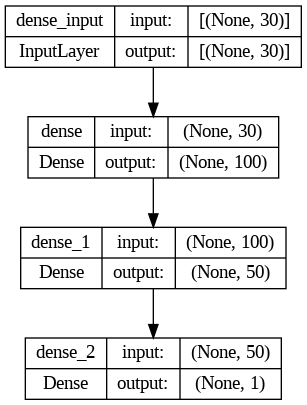

In [23]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## PyTorch

PyTorchは、ディープラーニングのための人気のあるライブラリです。このコードでは、Netというクラスを使って3層のニューラルネットワークを定義しています。各層はnn.Linearで定義され、活性化関数としてreluとsigmoidが使用されています。学習の際には、損失関数として二値交差エントロピー損失（BCELoss）を、最適化手法としてAdamを使用しています。学習ループでは、入力データをモデルに通し、予測を取得。その後、実際のラベルとの差を計算して、モデルのパラメータを更新しています。最後に、テストデータでの予測を行い、正解率を計算しています。PyTorchはその直感的なAPIと柔軟性で多くの研究者やエンジニアに支持されています。

In [24]:
# PyTorchを使用してニューラルネットワークモデルを定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 入力層として100ノードの隠れ層を持つDenseレイヤーを追加
        self.fc1 = nn.Linear(X_train.shape[1], 100)
        # 100ノードから50ノードへの隠れ層を追加
        self.fc2 = nn.Linear(100, 50)
        # 50ノードから1ノードへの出力層を追加
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        # 各レイヤーを通してデータを伝播
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# モデルのインスタンスを作成
net = Net()

# 損失関数としてBinary Cross Entropy Lossを使用
criterion = nn.BCELoss()
# 最適化アルゴリズムとしてAdamを使用
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 100エポックでモデルをトレーニング
for epoch in range(100):
    # 勾配を初期化
    optimizer.zero_grad()
    # モデルを使用して予測を計算
    outputs = net(torch.FloatTensor(X_train))
    # 損失を計算
    loss = criterion(outputs.squeeze(), torch.FloatTensor(y_train))
    # 勾配を計算
    loss.backward()
    # パラメータを更新
    optimizer.step()

# トレーニング後のモデルを使用してテストデータの予測を計算
with torch.no_grad():
    outputs = net(torch.FloatTensor(X_test))
    # 0.5を閾値としてバイナリラベルを取得
    predicted_torch = (outputs.squeeze() > 0.5).float()
    # 予測の正確さを計算
    accuracy_torch = (predicted_torch == torch.FloatTensor(y_test)).sum().item() / len(y_test)
    # 結果を辞書に保存
    accuracies['PyTorch'] = accuracy_torch
    predictions['PyTorch'] = predicted_torch.numpy()

# モデルの比較

In [25]:
for model, accuracy in accuracies.items():
    print(f"{model:25} : {accuracy:.4f}")

Logistic Regression       : 0.9737
Decision Tree             : 0.9474
Random Forest             : 0.9649
Gradient Boosting         : 0.9561
SVM                       : 0.9561
Neural Network (sklearn)  : 0.9737
XGBoost                   : 0.9561
LightGBM                  : 0.9649
CatBoost                  : 0.9649
TensorFlow                : 0.9737
PyTorch                   : 0.9912


## 単純な多数決のアンサンブル

In [26]:
# Accuracyの高い順にモデルをソート
sorted_models = sorted(accuracies.keys(), key=lambda x: accuracies[x], reverse=True)

# 上位のモデルの予測結果を組み合わせる
ensemble_preds = np.zeros_like(y_test, dtype=np.float64)
top_n = 3  # 上位3つのモデルを使用
for model in sorted_models[:top_n]:
    ensemble_preds += predictions[model]

# 多数決のアンサンブル
ensemble_preds = (ensemble_preds / top_n) > 0.5

# アンサンブルのAccuracyを計算
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"\nEnsemble Accuracy (Top {top_n} models) : {ensemble_accuracy:.4f}")


Ensemble Accuracy (Top 3 models) : 0.9825


# 閾値とAccuracy

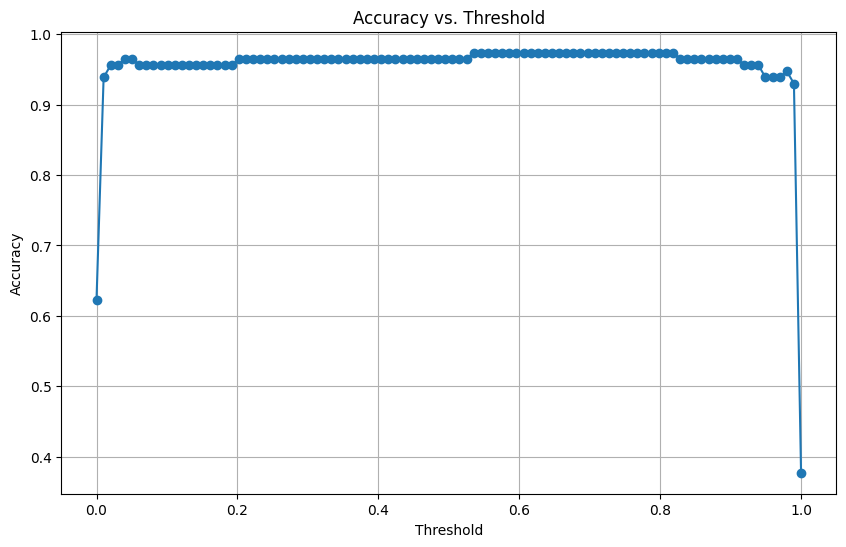

In [27]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {'objective': 'binary', 'boosting_type': 'gbdt', 'seed': SEED, 'verbose': -1}
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# 予測確率を取得
probs_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)

# 閾値の変化によるAccuracyの変動を計算
thresholds = np.linspace(0, 1, 100)
threshold_accuracies = [accuracy_score(y_test, [1 if p > threshold else 0 for p in probs_lgb]) for threshold in thresholds]

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(thresholds, threshold_accuracies, '-o')
plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

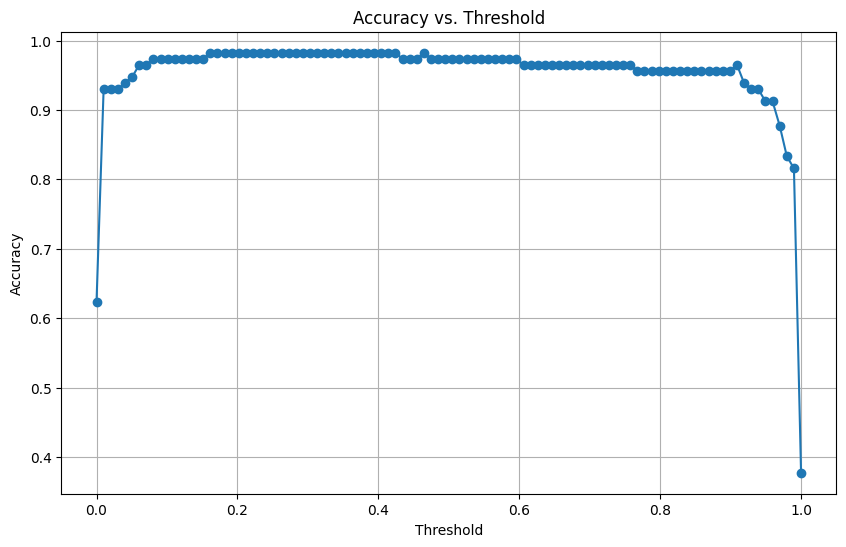

In [28]:
# PyTorchを使用してニューラルネットワークモデルを定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 入力層として100ノードの隠れ層を持つDenseレイヤーを追加
        self.fc1 = nn.Linear(X_train.shape[1], 100)
        # 100ノードから50ノードへの隠れ層を追加
        self.fc2 = nn.Linear(100, 50)
        # 50ノードから1ノードへの出力層を追加
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        # 各レイヤーを通してデータを伝播
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# モデルのインスタンスを作成
net = Net()

# 損失関数としてBinary Cross Entropy Lossを使用
criterion = nn.BCELoss()
# 最適化アルゴリズムとしてAdamを使用
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 100エポックでモデルをトレーニング
for epoch in range(100):
    # 勾配を初期化
    optimizer.zero_grad()
    # モデルを使用して予測を計算
    outputs = net(torch.FloatTensor(X_train))
    # 損失を計算
    loss = criterion(outputs.squeeze(), torch.FloatTensor(y_train))
    # 勾配を計算
    loss.backward()
    # パラメータを更新
    optimizer.step()

# トレーニング後のモデルを使用してテストデータの予測を計算
with torch.no_grad():
    outputs = net(torch.FloatTensor(X_test))
    # 0.5を閾値としてバイナリラベルを取得
    predicted_torch = (outputs.squeeze() > 0.5).float()
    # 予測の正確さを計算
    accuracy_torch = (predicted_torch == torch.FloatTensor(y_test)).sum().item() / len(y_test)
    # 結果を辞書に保存
    accuracies['PyTorch'] = accuracy_torch
    predictions['PyTorch'] = predicted_torch.numpy()

# 予測確率を取得
probs_pytorch = outputs.squeeze().numpy()

# 閾値の変化によるAccuracyの変動を計算
thresholds = np.linspace(0, 1, 100)
threshold_accuracies = [accuracy_score(y_test, [1 if p > threshold else 0 for p in probs_pytorch]) for threshold in thresholds]

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(thresholds, threshold_accuracies, '-o')
plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()